In [360]:
#requeriment

### <font color='Red'>**Projeto de disciplina - Machine Learning - Algoritimos Supervisionados.**</font>


**Escopo:** Criar um modelo de classificação para vinhos, de acordo com o Dataset informado no projeto. Dentre as opção de classificadores, verificar qual apresenta o melhor resultado. 

**OBS:** Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".


### **1º Questão**

Faça o módulo do Kaggle Intro to Machine Learning:
Comprove a finalização do módulo com um print que contenha data e identificação do aluno:

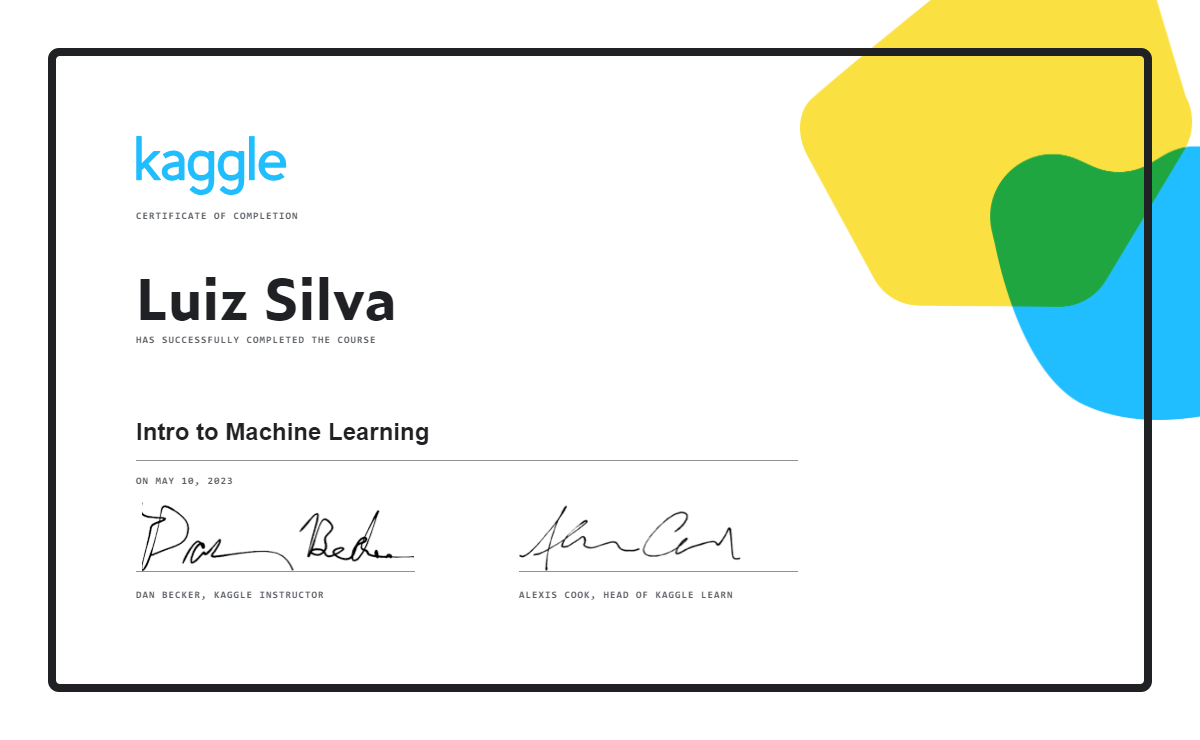

**Devido a importancia da temática, decidir também fazer o nível intermediário.**

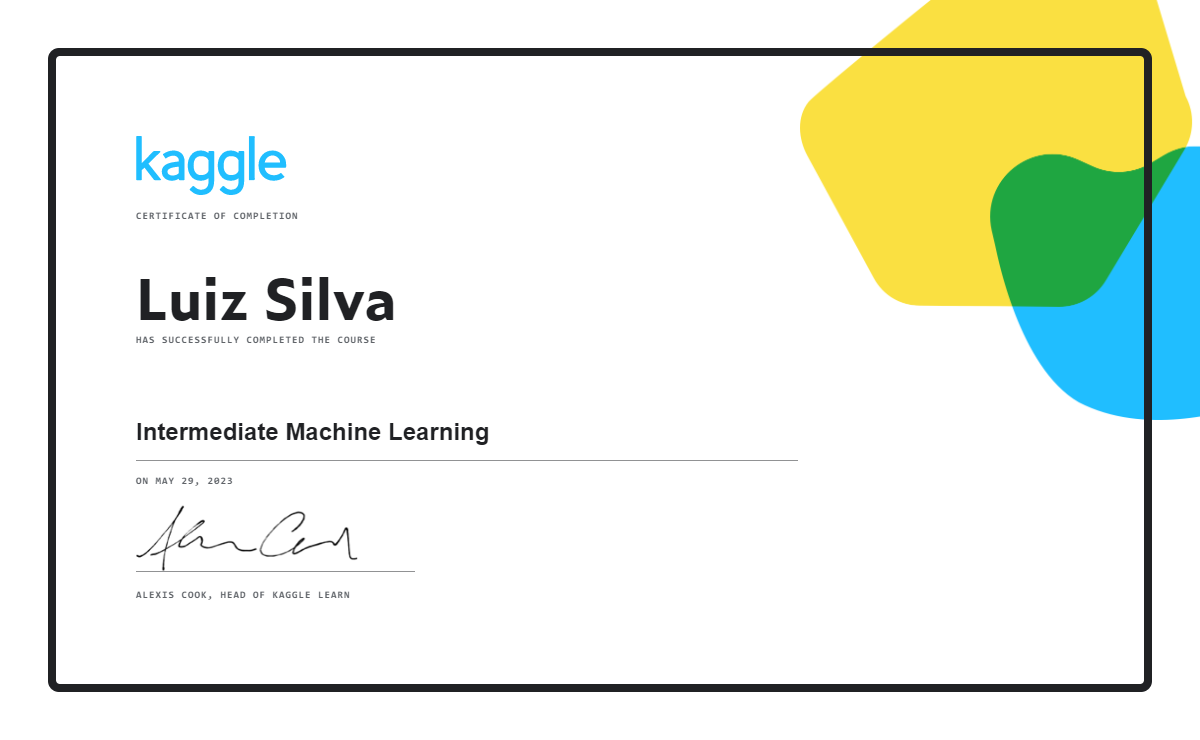

### **2º Questão**

Faça o download da base - esta é uma base real, apresentada no artigo:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. 

Crie uma nova variável, chamada *"opinion"* que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. *Desconsidere a variável quality para o restante da análise.*

**OBS**.: Dataset salvo na pasta data.


**Iniciaremos importando todas as LIB's que serão utilizadas na análise**

In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from copy import deepcopy as cp
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay
)

warnings.filterwarnings("ignore")
sns.set_style("ticks")
sns.set_context("paper")

**Criando DataFrame para início das análises**

In [362]:
df = pd.read_csv("data/winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Criação da variável *"opinion"***

In [363]:
df['opinion'] = (df['quality']>5).astype(int)
df.drop('quality', axis=1, inplace=True)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


### **3º Questão**

Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

**Informações sobre as variáveis**

In [364]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  opinion               6497 non-null   int32  
dtypes: float64(11), int32(1), object(1)
memory usage: 634.6+ KB


***Resposta questão 03***

**TIPOS DE VARIÁVEIS DO DATAFRAME**: 
````
0 - Type                         -----> Categórica
1 - acidez fixa                  -----> Contínua 
2 - acidez volátil               -----> Contínua 
3 - ácido cítrico                -----> Contínua 
4 - açúcar residual              -----> Contínua 
5 - cloretos                     -----> Contínua 
6 - dióxido de enxofre livre     -----> Contínua 
7 - dióxido de enxofre total     -----> Contínua 
8 - densidade                    -----> Contínua 
9 - pH                           -----> Contínua 
10 - sulfatos                    -----> Contínua 
11 - álcool                      -----> Contínua 
12 - qualidade(entre 0 e 10)     -----> Categórica Discreta 
````

**Média e Desvio padrão - DF Total**

In [365]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,0.633061
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.482007
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


**Média e desvio Padrão apenas dos Vinhos tipo Branco - Total de 4890 unidades**

In [366]:
df_white = df[df.type=="white"].copy().drop("type", axis=1)
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,0.665169
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


**Média e desvio Padrão apenas dos Vinhos tipo Vermelhos - Total de 1597 unidades**

In [367]:
df_red = df[df.type=="red"].copy().drop(["type"], axis=1)
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,1597.000000,1598.000000,1598.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1597.000000,1597.000000,1599.000000,1599.000000
mean,8.322104,0.527738,0.271145,2.538806,0.087467,15.874922,46.467792,0.996747,3.310864,0.658078,10.422983,0.534709
std,1.740767,0.179085,0.194744,1.409928,0.047065,10.460157,32.895324,0.001887,0.154290,0.169594,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


### **4º Questão:**

````
Com a base escolhida, no nosso caso Vinhos Brancos - df_white

A)

Descreva as etapas necessárias para criar um modelo de classificação eficiente.

B)

Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

C)

Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

D)

Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

````

#### ***Resposta A***

Para criar um modelo de classificação eficiente, é necessário seguir as seguintes etapas:

1 - Coleta e Preparação dos dados: Esta etapa envolve a coleta dos dados relevantes para o modelo de classificação e a preparação desses dados para a análise. Isso pode incluir o tratamento de dados faltantes, remoção de outliers e normalização dos dados.

2 - Seleção das Variáveis Relevantes: Nesta etapa, o objetivo é determinar quais variáveis são relevantes para o modelo de classificação. Isso pode ser feito por meio de análises exploratórias de dados e técnicas de seleção de recursos, como a análise de componentes principais (PCA) ou a seleção de recursos baseada em árvores de decisão.

3 - Escolha do algoritmo de classificação: Existem diversos algoritmos de classificação, como regressão logística, árvores de decisão, random forest, SVM, entre outros. A escolha do algoritmo depende do tipo de dados, do tamanho do conjunto de dados e do objetivo do modelo.

4 - Treinamento do modelo: Nesta etapa, o modelo é treinado com os dados disponíveis, usando um conjunto de treinamento. O objetivo é ajustar os parâmetros do modelo de modo a minimizar o erro nos dados conhecidos.

5 - Avaliação do modelo: Após o treinamento do modelo, é necessário avaliar o desempenho do modelo em dados desconhecidos. Isso pode ser feito usando um conjunto de validação ou com técnicas de validação cruzada.

6 - Ajuste do modelo: Se o desempenho do modelo não for satisfatório, é necessário revisar as etapas anteriores para melhorá-lo. Isso pode incluir a seleção de variáveis adicionais, a escolha de um algoritmo diferente ou o uso de técnicas avançadas de treinamento.

7 - Implantação do modelo: Finalmente, o modelo deve ser implantado em um ambiente de produção, onde ele pode ser usado para fazer previsões em tempo real.

#### **ADENDO 01 - VIZUALIZAÇÃO - DF_WHITE**

**CORRELAÇÃO ENTRE AS VARIÁVEIS**

Podemos observar quais variáveis tem melhor correlação direta e indiretamente. 

Abaixo variáveis do DataFrame df_white

In [368]:
vars = ['fixed acidity','volatile acidity','citric acid','residual sugar',
        'chlorides','free sulfur dioxide','total sulfur dioxide','density',
        'pH','sulphates','alcohol']

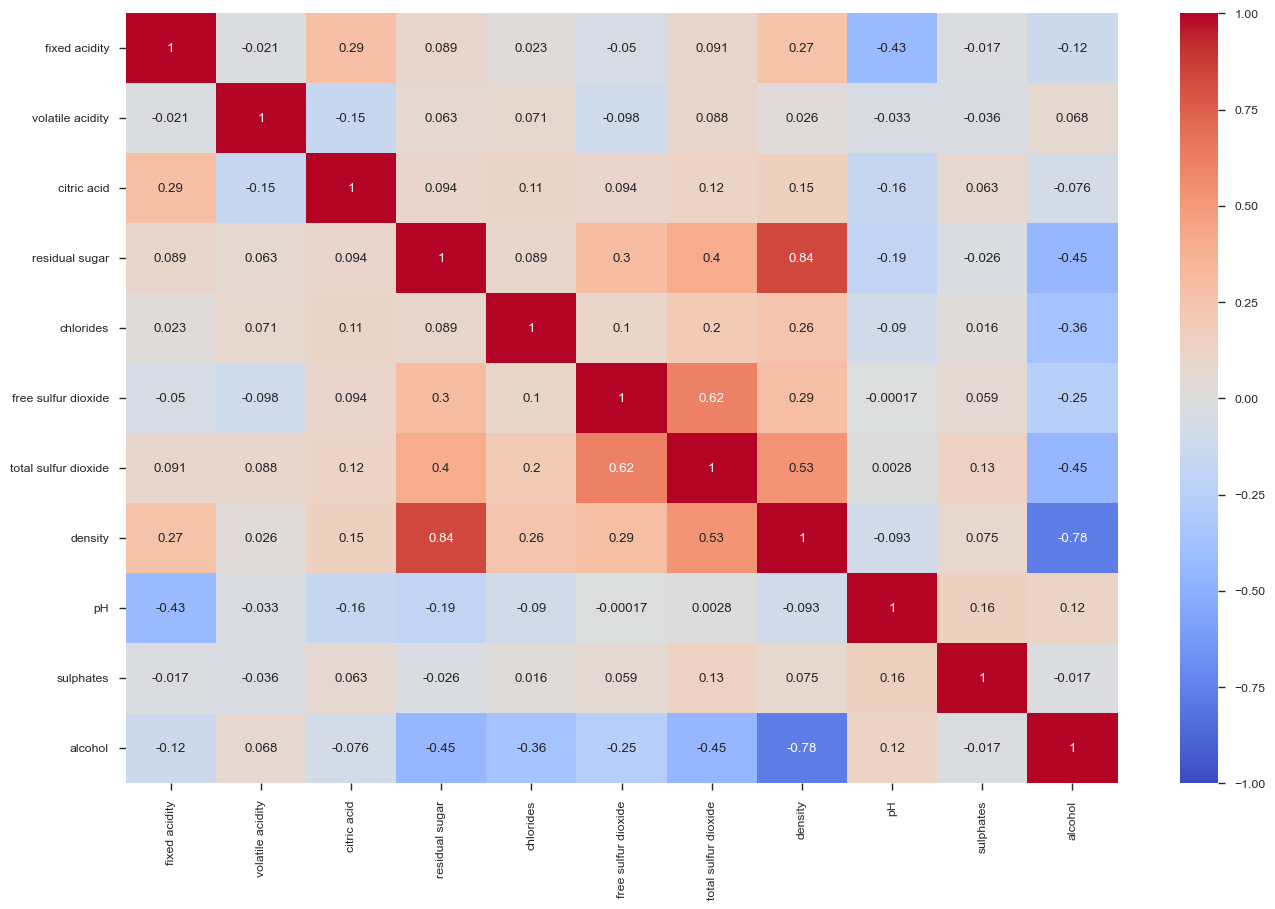

In [369]:
fig, ax = plt.subplots(1,1, figsize=(16,10))
sns.heatmap(df_white[vars].corr(),vmax=1, vmin=-1, annot=True, cmap='coolwarm');

**DISTRIBUIÇÃO DA VARIÁVEL OPNION**

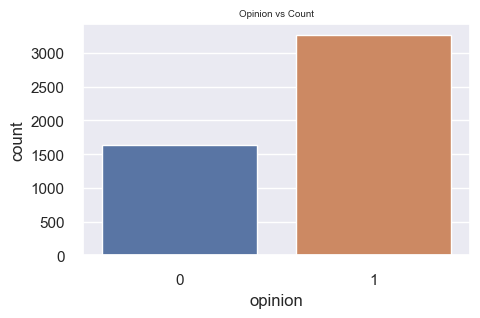

In [370]:
plt.figure(figsize=(5,3))
sns.set(font_scale=1)
plt.title("Opinion vs Count",fontsize=7)
sns.countplot(x=(df_white['opinion']));

#### **ADENDO 02 - AJUSTES DOS DADOS**

**Verificando dados NaN Vinhos Brancos e Vermelhos**

In [371]:
# Vinhos Brancos

print(df_white.isna().sum())

print('*'*25)

#Vinhos vermelhos

print(df_red.isna().sum())

fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
opinion                 0
dtype: int64
*************************
fixed acidity           2
volatile acidity        1
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      2
sulphates               2
alcohol                 0
opinion                 0
dtype: int64


**Excluindo dados NaN Vinhos Brancos e Vermelhos**

In [372]:
#vinhos Brancos
df_white.dropna(inplace=True)

#Vinhos Tintos

df_red.dropna(inplace=True)

**Excluindo Outliers**

**Visualizando cada variável Vinhos Brancos e Vinhos Tintos**

Observado de imediato possíveis outlier nas variáveis *Free sulfur Dioxide* e *Total Sulfur Dioxide*.

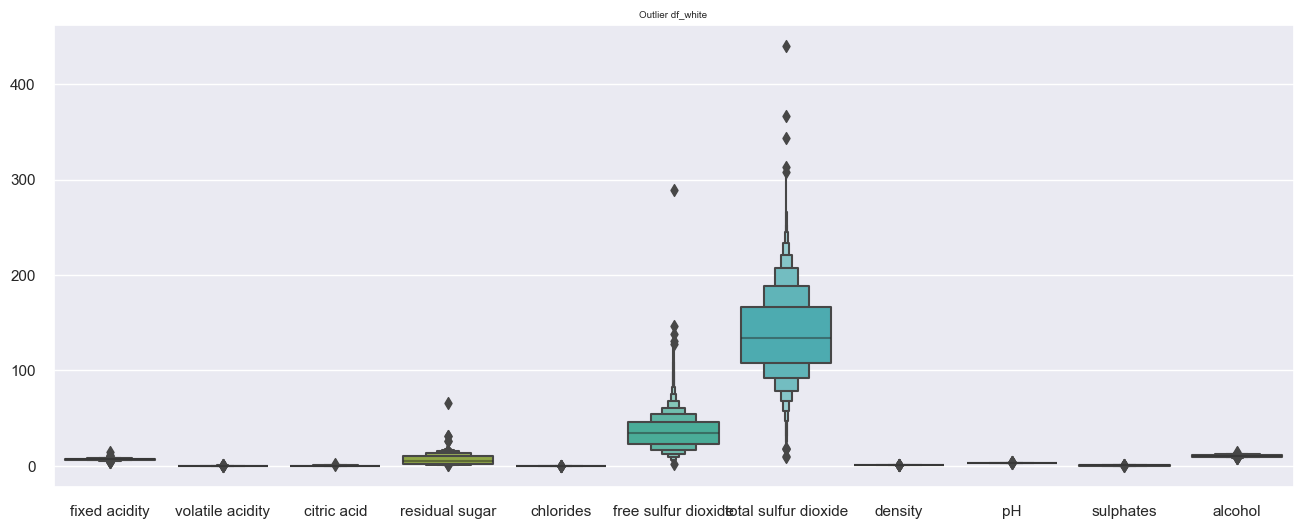

In [373]:
# Vinhos Brancos

plt.figure(figsize=(16,6))
sns.set(font_scale=1)
plt.title("Outlier df_white",fontsize=7)
sns.boxenplot(df_white.drop('opinion', axis=1));


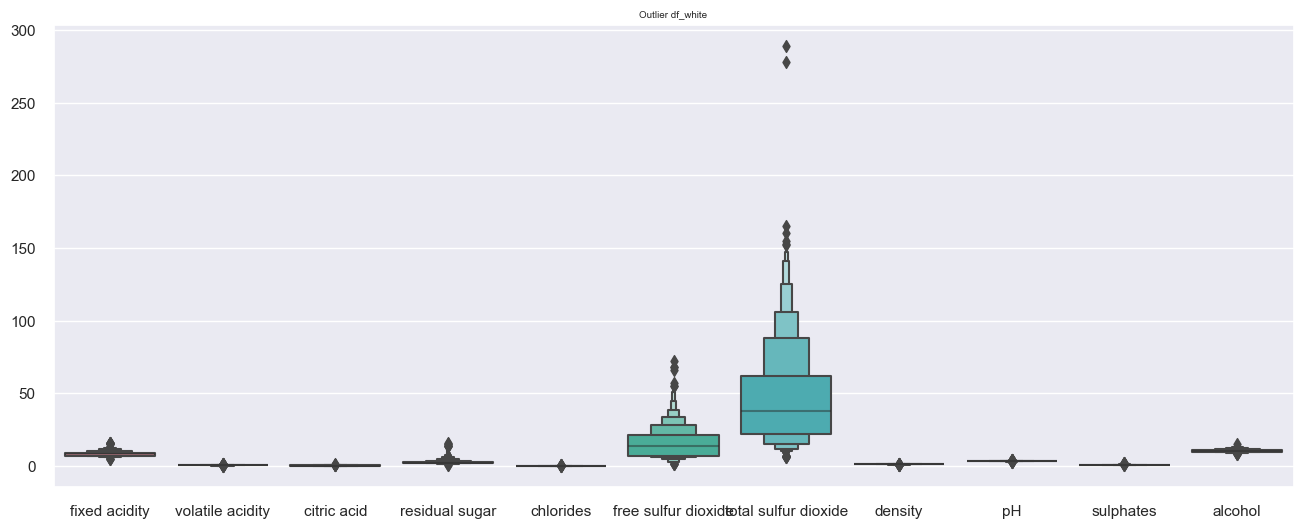

In [374]:
#Vinhos Tintos

plt.figure(figsize=(16,6))
sns.set(font_scale=1)
plt.title("Outlier df_white",fontsize=7)
sns.boxenplot(df_red.drop('opinion', axis=1));

**Excluindo outlier das variaveis *Free sulfur Dioxide* e *Total Sulfur Dioxide***

Foi percebido que os vinhos brancos possuia mais outlier que os tintos.

OBS: Index reset aplicado. 

In [375]:
#Vinho Branco

df_white = df_white.drop(index = df_white[df_white['free sulfur dioxide'] > 200 ].index)
df_white = df_white.drop(index = df_white[df_white['total sulfur dioxide']
                                          > 320 ].index)
df_white = df_white.drop(index = df_white[df_white['residual sugar']
                                          > 35 ].index).reset_index().drop('index', axis=1)

#Vinhos tintos

df_red = df_red.drop(index = df_red[df_red['total sulfur dioxide']
                                          > 166 ].index).reset_index().drop('index', axis=1)

#### ***Respostas B, C e D***

**REGRESSÃO LOGÍTICA**



*SEPARAÇÃO E PRÉ-PROCESSAMENTO DOS DADOS*

In [376]:
X_train, X_test, y_train, y_test = train_test_split(df_white[vars],
                                                    df_white['opinion'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df_white['opinion'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*MODELO E PREDIÇÃO*

In [377]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

#Predição


LogisticRegression(max_iter=10000)

In [378]:
y_hat = logreg.predict_proba(X_train_scaled)

*VIZUALIZAÇÃO COM PONTO DE CORTE*

OBS.: Ponto de corte 0.5 por default no sklearn

**USANDO DADOS DE TREINO**

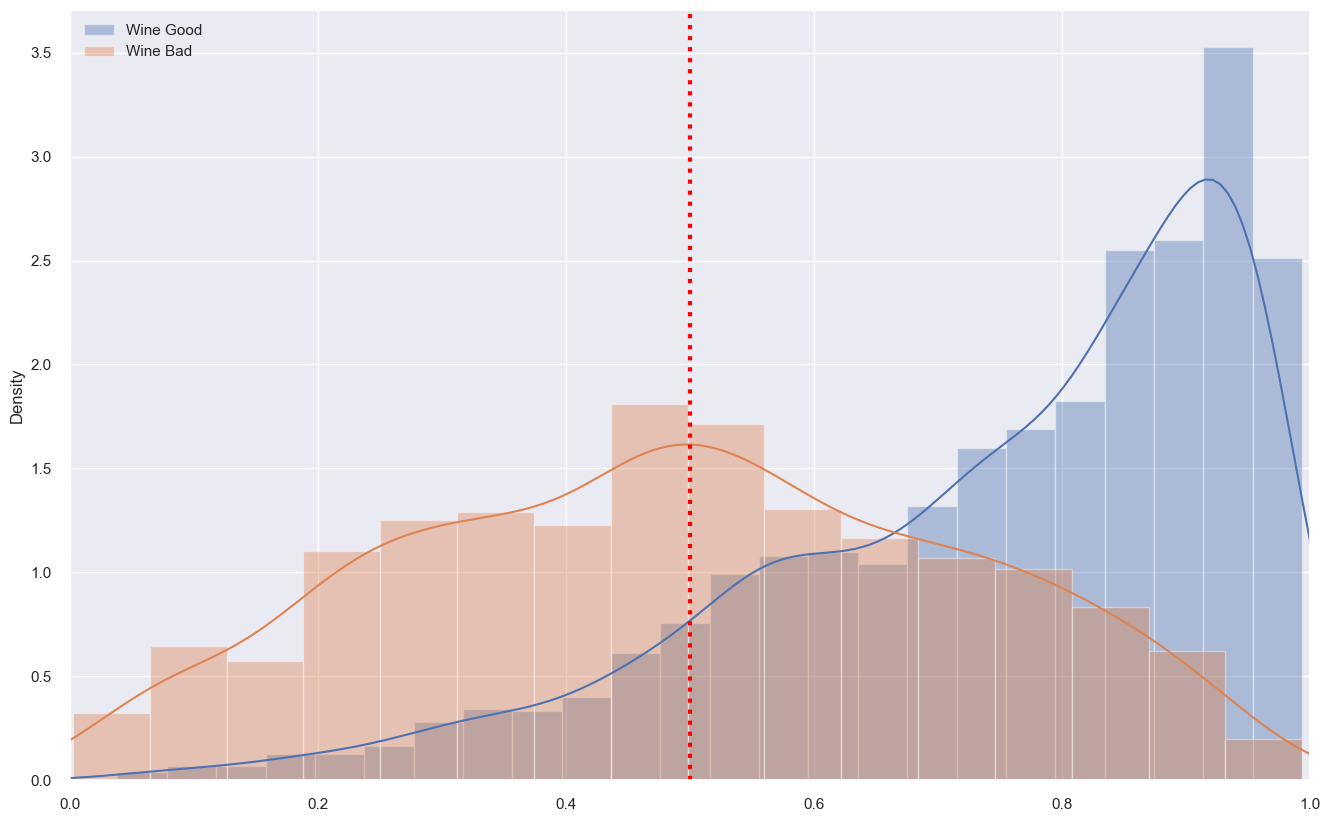

In [379]:
fig, ax = plt.subplots(1,1, figsize=(16,10))
sns.distplot(y_hat[y_train==1,1], label="Wine Good", ax=ax) 
ax.set_xlim([0,1])
sns.distplot(y_hat[y_train==0,1], label="Wine Bad", ax=ax)

ax.legend()
ax.axvline(0.5, color="red", ls=":", lw=3);

**USANDO DADOS DE VALIDAÇÃO**

O comportamento está parecido com os dados de treino

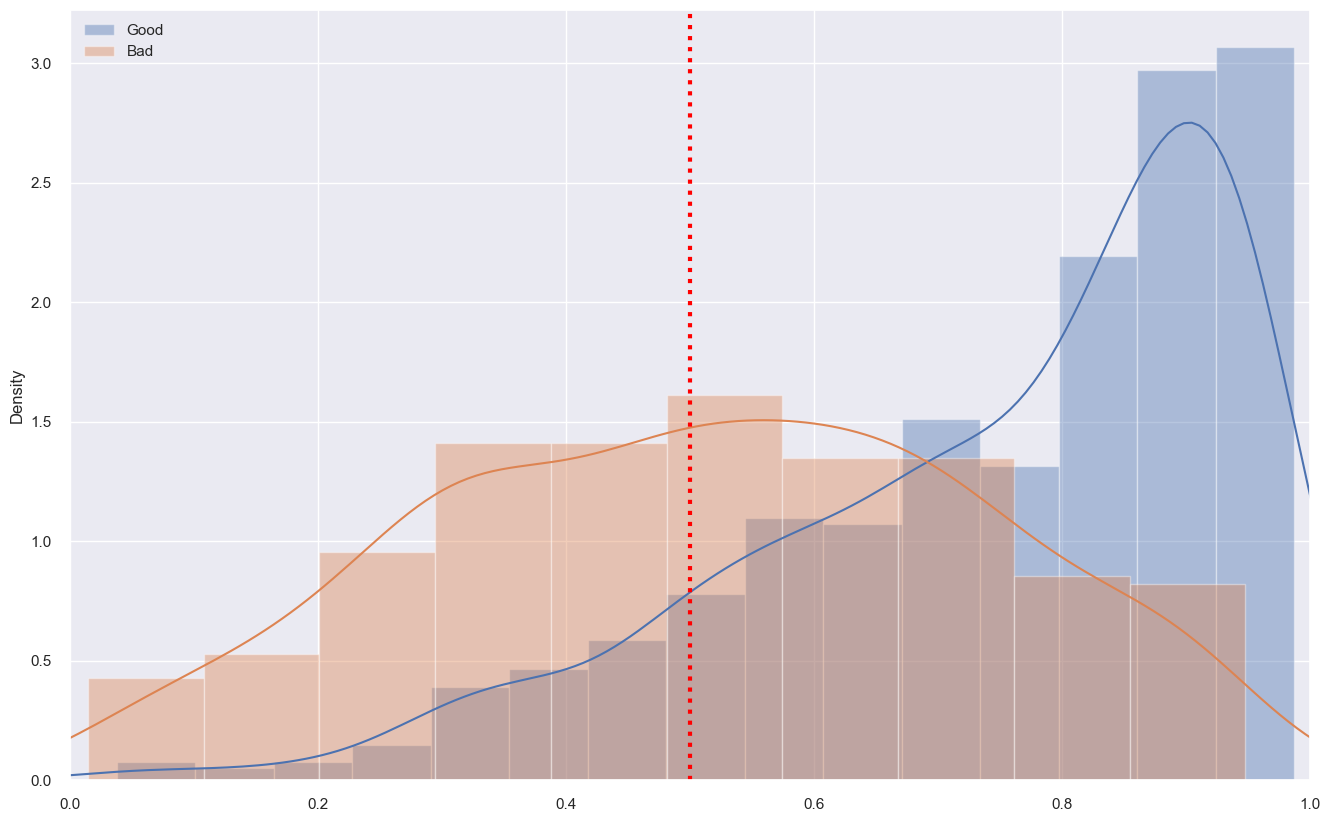

In [380]:
y_hat_test =logreg.predict_proba(X_test_scaled)
fig, ax = plt.subplots(1,1, figsize=(16,10));
sns.distplot(y_hat_test[y_test==1,1], label="Good", ax=ax) 
ax.set_xlim([0,1])
sns.distplot(y_hat_test[y_test==0,1], label="Bad", ax=ax)

ax.legend();

ax.axvline(0.5, color="red", ls=":", lw=3);

*MATRIZ DE CONFUSÃO*

Resultado abaixo:

*NA CLASSE PREDITA O MODELO ACERTOU 2293 E ERROU 634*

*NA CLASSE DE TREINO O MODELO ACERTOU 667 E ERROU 298*

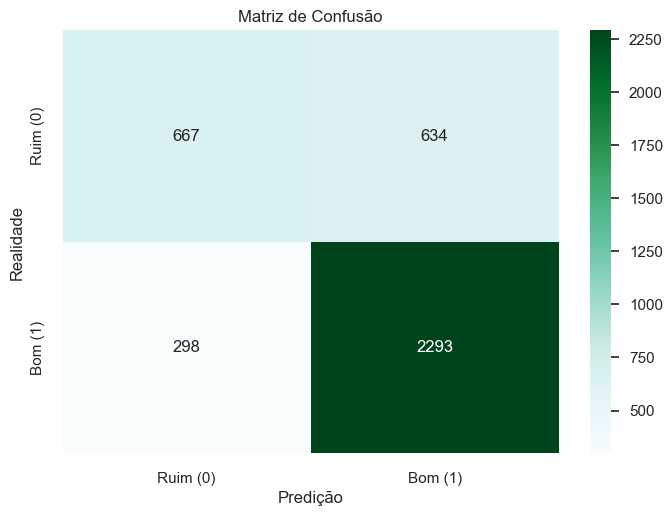

In [381]:
y_pred = logreg.predict(X_train_scaled)

cm = confusion_matrix(y_train, y_pred)

ax = sns.heatmap(cm, cmap="BuGn", annot=True, fmt='g')
ax.set_xlabel("Predição")
ax.set_ylabel("Realidade")
ax.set_title("Matriz de Confusão")

ax.set_xticklabels(["Ruim (0)", "Bom (1)"]);
ax.set_yticklabels(["Ruim (0)", "Bom (1)"]);

*MÉTRICAS DE AVALIAÇÃO*


*   **A acurácia (accuracy)** é uma medida da proporção de predições corretas em relação ao número total de amostras classificadas.

*   **O F1 Score** é uma medida combinada de precisão e sensibilidade que leva em conta tanto os verdadeiros positivos, como os falsos positivos e falsos negativos.

*   **A sensibilidade (recall ou true positive rate)** é uma medida da proporção de verdadeiros positivos em relação ao total de positivos reais.

*   **A precisão (precision)** é uma medida da proporção de verdadeiros positivos em relação ao total de positivos previstos pelo modelo.


*Usando métodos matemáticos*

In [382]:
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
sensibility = (cm[1, 1] / (cm[1, 1] + cm[1, 0]))
specificity = (cm[0,0] / (cm[0, 0] + cm[0 ,1])) 
F1_score = 2 *(sensibility * precision) / (sensibility + precision)

print(f"A precisão é {100*  precision:.2f} %")
print(f"A acurácia é {100 * accuracy:.2f} %")
print(f"A sensibilidade é {100 *  sensibility:.2f} % (taxa de verdadeiro positivo)")
print(f"A especificidade é {100 * specificity:.2f} % (1 - taxa de falsos positivos)")
print(f"F1 Score =  {F1_score:.2f}")


A precisão é 78.34 %
A acurácia é 76.05 %
A sensibilidade é 88.50 % (taxa de verdadeiro positivo)
A especificidade é 51.27 % (1 - taxa de falsos positivos)
F1 Score =  0.83


*Usando metodos do Sklearn*

OBS.: Não temos a métrica Especificidade no Sklearn

In [383]:
print(f"A acurácia é {100 * accuracy_score(y_train, y_pred):.2f} %")
print(f"A sensibilidade é {100 *  recall_score(y_train, y_pred):.2f} %")
print(f"A precisão é {100*  precision_score(y_train, y_pred):.2f} %")

A acurácia é 76.05 %
A sensibilidade é 88.50 %
A precisão é 78.34 %


**REPORT DO SKLEARN**

OBS.: Lembrando que  y_pred está trabalhando por default no ponto de corte em 0.5

In [384]:
print(classification_report(y_train, y_pred)) 

              precision    recall  f1-score   support

           0       0.69      0.51      0.59      1301
           1       0.78      0.88      0.83      2591

    accuracy                           0.76      3892
   macro avg       0.74      0.70      0.71      3892
weighted avg       0.75      0.76      0.75      3892



**Mudando o Threshold (Ponto de Corte)**

O objetivo é variar o ponto de operação de um classificador

Teremos muito mais bons vinhos sendo selecionados, porém, perdemos vinhos bons também neste ponto de corte. 

*Visualizando Threshold 0.75*

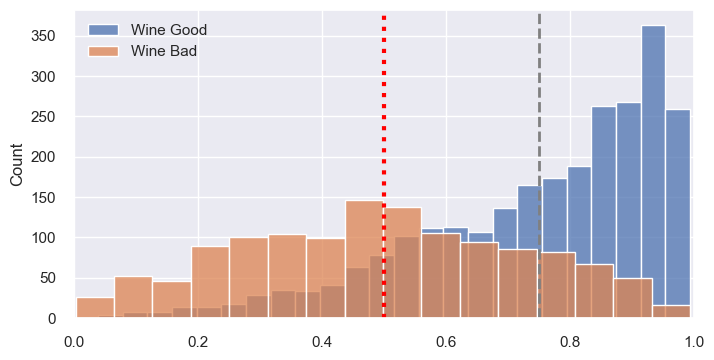

In [387]:
def plot_distributions(model, X, y, ax=None):
    y_hat = model.predict_proba(X)
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    sns.histplot(y_hat[y.values == 1, 1], label="Wine Good", ax=ax)
    ax.set_xlim([0, 1])
    sns.histplot(y_hat[y == 0, 1], label="Wine Bad", ax=ax)
    ax.legend();
    return ax

ax = plot_distributions(logreg, X_train_scaled, y_train)


ax.axvline(0.5, lw=3, color='red', ls=":");
ax.axvline(0.75, lw=2, color='gray', ls="--");

**Escolhando outros Thresholds**

OBS,> Teremos 100 marcadores no intervalo de 0 a 1.

In [389]:
y_hat = logreg.predict_proba(X_train_scaled)
thresholds = np.linspace(0, 1, 101) 

def specificity_score(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    specificity = (cm[0,0] / (cm[0, 0] + cm[0 ,1]))
    return specificity

def predict(model, X, threshold): 
    y_hat = model.predict_proba(X) 
    y_pred = [] 
    for prob_0, prob_1 in y_hat: 
        if prob_1 > threshold: 
            y_pred.append(1.)
        else:
            y_pred.append(0.) 
    return np.array(y_pred)


recall = []
precision = []
specificity = []
f1 = []

for threshold in thresholds:
    y_pred_thr = predict(logreg, X_train_scaled, threshold) 
    recall.append(recall_score(y_train, y_pred_thr)) 
    precision.append(precision_score(y_train, y_pred_thr))
    specificity.append(specificity_score(y_train, y_pred_thr)) 
    f1.append(f1_score(y_train, y_pred_thr))

print("Métricas para os 100 pontos de corte")
print()
print(recall)
print('*'*15)
print(precision)
print('*'*15)
print(f1)

Métricas para os 100 pontos de corte

[1.0, 1.0, 1.0, 1.0, 0.9996140486298727, 0.9996140486298727, 0.9984561945194905, 0.9984561945194905, 0.9984561945194905, 0.9976842917792358, 0.9961404862987263, 0.995754534928599, 0.995754534928599, 0.9953685835584717, 0.9942107294480895, 0.9930528753377075, 0.9930528753377075, 0.9918950212273253, 0.9911231184870706, 0.9899652643766885, 0.987263604785797, 0.9864917020455423, 0.9853338479351602, 0.9845619451949055, 0.983018139714396, 0.9803164801235045, 0.9791586260131223, 0.9776148205326128, 0.9752991123118487, 0.9725974527209572, 0.9691238903898108, 0.9664222307989193, 0.9644924739482825, 0.9610189116171363, 0.9594751061366268, 0.953299884214589, 0.9513701273639521, 0.9475106136626785, 0.9455808568120417, 0.9424932458510228, 0.9378618294094944, 0.9324585102277113, 0.928984947896565, 0.9251254341952914, 0.9201080663836356, 0.9139328444615978, 0.9089154766499421, 0.9038981088382864, 0.8957931300656118, 0.8896179081435739, 0.8849864917020456, 0.87495

*Visualizando os pontos de corte e identificando qual o melhor por meio do F1_Score*

f1 máximo: 0.83 - ponto de operação: 0.50
Recall: 0.88 - Precision: 0.78


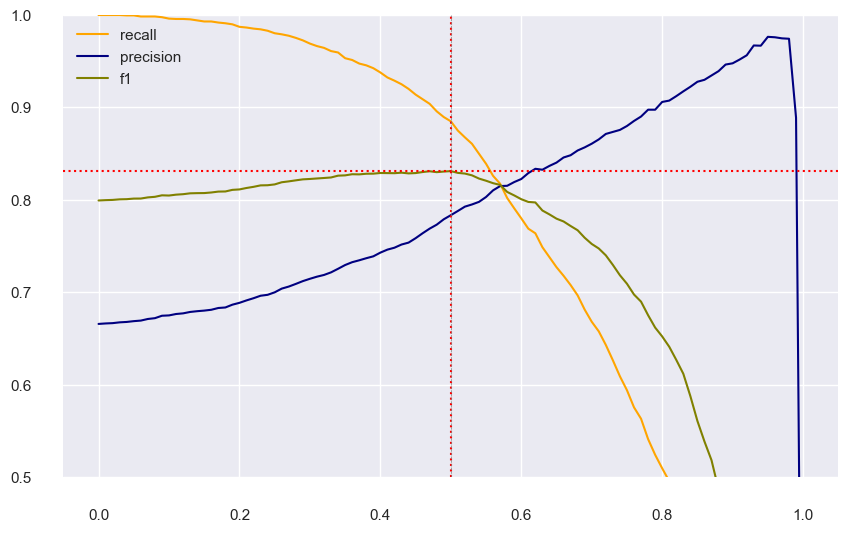

In [390]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(thresholds, recall, color="orange", label="recall")
ax.plot(thresholds, precision, color="navy", label="precision")
ax.plot(thresholds, f1, color="olive", label="f1")

f1_max = max(f1) 
thr_arg_max = np.argmax(f1) 
thr_max = thresholds[thr_arg_max] 

ax.axvline(thr_max, color="red", ls=":") 
ax.axvline(0.5, color="gray",lw=0.5, ls="--")
ax.axhline(f1_max, color="red", ls=":")

ax.legend()
ax.set_ylim([0.5, 1])
print(f"f1 máximo: {f1_max:.2f} - ponto de operação: {thr_max:.2f}")
print(f"Recall: {recall[thr_arg_max]:.2f} - Precision: {precision[thr_arg_max]:.2f}")
sns.despine(offset=10)



**True positive rate ou taxa de verdadeiro positivo - TPR**

**False positive rate ou taxa de falso positivos - FPR**

In [391]:
tpr = recall

fpr = [(1 - s) for s in specificity]

**Curva ROC**

A curva ROC, do inglês Receiver Operating Characteristic Curve, ou na tradução “Curva Característica de Operação do Receptor” é um gráfico que permite avaliar um classificador binário. Essa visualização leva em consideração a taxa de verdadeiros positivos (TVP; ou sensibilidade) e a taxa de falsos positivos (TFP; ou 1 – especificidade). Essas taxas também podem ser referidas pelas siglas TPR (True Positive Rate) e FPR (False Positive Rate), respectivamente. Esse gráfico permite comparar diferentes classificadores e definir qual o melhor com base em diferentes pontos de corte. Na prática, quanto mais próximo do topo do eixo Y melhor o classificador 

![alt text](https://www.spectrumnews.org/wp-content/uploads/2016/08/fig-3-1.gif)

*Visualizando Curva ROC com Threshold ideal*

(0.0, 1.0)

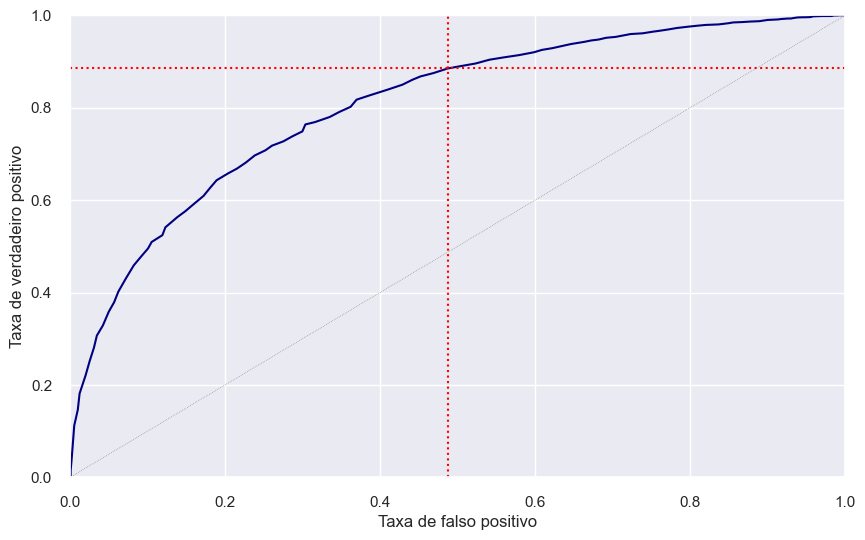

In [392]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(fpr, tpr, color="navy")
ax.set_ylabel("Taxa de verdadeiro positivo")
ax.set_xlabel("Taxa de falso positivo")

ax.axvline(fpr[thr_arg_max], color="red", ls=":") 
ax.axhline(tpr[thr_arg_max], color="red", ls=":")
ax.plot(thresholds, thresholds, color= "gray", ls=":", lw=0.5) 
ax.set_ylim([0., 1.]) 
ax.set_xlim([0., 1.])


*Área da Curva ROC*

In [393]:
auc_score = auc(fpr, tpr)
print(f"Area Under Curve (AUC): {auc_score:.2f}")

Area Under Curve (AUC): 0.81


*Usando Funções para determinar a AUC e F1 Maximum*

In [394]:
def get_f1_score_list(model, X, y, thresholds):
    list_of_f1 = []
    for threshold in thresholds: 
        y_pred = predict(model, X, threshold)
        f1 = f1_score(y, y_pred) 
        list_of_f1.append(f1)
    return list_of_f1  

def get_max_f1_score(model, X, y, thresholds):
    list_of_f1 = get_f1_score_list(model, X, y, thresholds)
    f1_max = max(list_of_f1) 
    f1_arg_max = np.argmax(list_of_f1)
    threshold_max = thresholds[f1_arg_max] 
    return f1_max, threshold_max, f1_arg_max


fpr, tpr, thresholds = roc_curve(y_train, y_hat[:, 1], pos_label=1)
auc_score = auc(fpr, tpr)
f1_max, threshold_max, f1_arg_max =  get_max_f1_score(logreg,
                                                      X_train_scaled,
                                                      y_train,
                                                      thresholds)


print(f"Area Under Curve (AUC): {auc_score:.2f}")
print(f"Maximum F1 : {f1_max:.2f} at {threshold_max:.3f}")

Area Under Curve (AUC): 0.81
Maximum F1 : 0.83 at 0.470


*Visualiazação*

Criando dois plot's um com a distribuição e outro com a curva ROC 

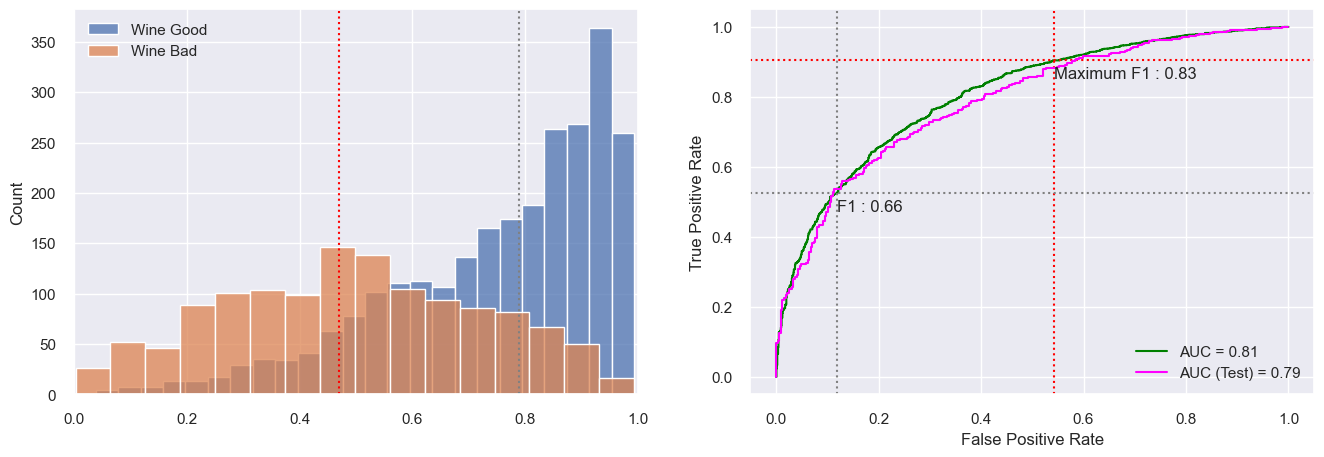

In [395]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5)) 

threshold_random = 500 

# plot da distribuicao 
plot_distributions(logreg, X_train_scaled, y_train, ax=axes[0])
axes[0].axvline(threshold_max, color="red", ls=":")
axes[0].axvline(thresholds[threshold_random], color="gray", ls=":")

# plot da curva roc com dados de treino
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score).plot(ax=axes[1],color="green")
axes[1].axvline(fpr[f1_arg_max], color="red", ls=":")
axes[1].axhline(tpr[f1_arg_max], color="red", ls=":")
axes[1].annotate(f"Maximum F1 : {f1_max:.2f}", (fpr[f1_arg_max], tpr[f1_arg_max] - 0.05))


f1_list = get_f1_score_list(logreg, X_train_scaled, y_train, thresholds)


axes[1].axvline(fpr[threshold_random], color="gray", ls=":")
axes[1].axhline(tpr[threshold_random], color="gray", ls=":")

axes[1].annotate(f"F1 : {f1_list[threshold_random]:.2f}",
                        (fpr[threshold_random],
                         tpr[threshold_random] - 0.05))


# ROC CURVE Test
y_hat_test = logreg.predict_proba(X_test_scaled)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_test[:, 1], pos_label=1)
auc_score_test = auc(fpr_test, tpr_test)


#Plot curva roc usando dados de test ou validação
#*podemos analisar se há variações muito grandes.
 
RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=auc_score_test).plot(ax=axes[1],
                                                                         label=f"AUC (Test) = {auc_score_test:.2}",
                                                                         color="magenta");

**Fazendo Validação Cruzada**

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Kfold.pdf/page1-220px-Kfold.pdf.jpg)

**Usando K=10**

LogisticRegression
========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 0.83, Meu resultado para validação de F1-Score é 0.81
Meu resultado para treino de  Acurácia é de 0.76, Meu resultado para validação de Acurácia é de 0.74
Meu resultado para treino de  Recall é de 0.88, Meu resultado para validação de Recall é de 0.85
Meu resultado para treino de  Precision é de 0.79, Meu resultado para validação de Precision é de 0.78
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 0.83, Meu resultado para validação de F1-Score é 0.83
Meu resultado para treino de  Acurácia é de 0.76, Meu resultado para validação de Acurácia é de 0.76
Meu resultado para treino de  Recall é de 0.88, Meu resultado para validação de Recall é de 0.88
Meu resultado para treino de  Precision é de 0.79, Meu resultado para validação de Precision é de 0.79
========================= FOLD 2 ==========================
Meu resulta

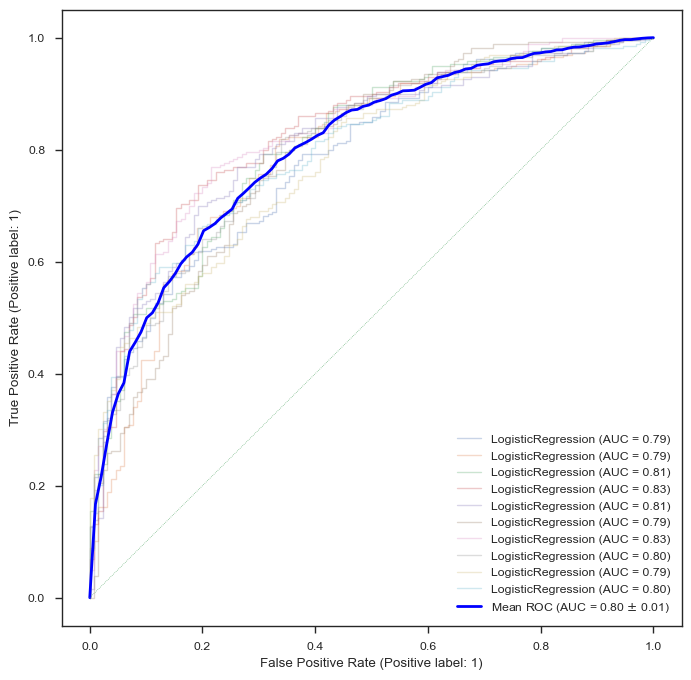

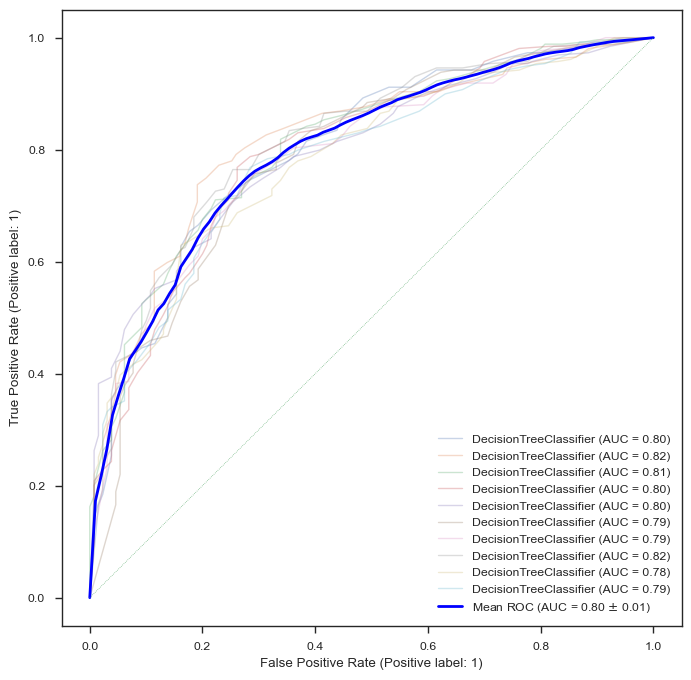

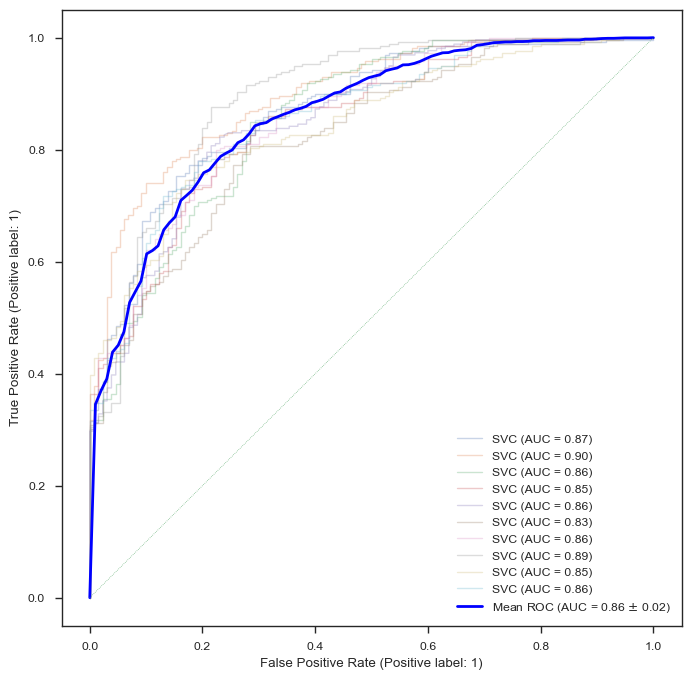

In [400]:
random_state = 42

X = df_white[vars]
y = df_white['opinion']

X_train_cv, X_test, y_train_cv, y_test = train_test_split(X.values,
                                                          y.values,
                                                          test_size=0.2, 
                                                          random_state=42,
                                                          stratify=y)

def interpolation(fpr, tpr):
    interp_fpr = np.linspace(0, 1, 100)
    interp_tpr = np.interp(interp_fpr, fpr, tpr)
    interp_tpr[0] = 0.
    return interp_fpr, interp_tpr

def train(X, y, model_klass, model_kwargs = {}):
    cv = StratifiedKFold(n_splits=10) 
    f1_score_val_list = []
    f1_score_train_list = []
    model_list = []
    scaler_list = []
    accuracy_score_val_list    = []
    accuracy_score_train_list  = []
    recall_score_val_list      = []
    recall_score_train_list    = []
    precision_score_val_list   = []
    precision_score_train_list = []

    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    fprs_list = []
    tprs_list = []
    auc_list  = []

    # Validação cruzada só em Training Data
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train = X[train_idx, :]
        y_train = y[train_idx]
        X_val = X[val_idx, :]
        y_val = y[val_idx]

        # Escala
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        scaler_list.append(scaler)

        # Treino
        model = model_klass(**model_kwargs)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_train_scaled)

        y_pred_val = model.predict(X_val_scaled)
        print(f"========================= FOLD {fold} ==========================")
        print(f"Meu resultado para treino de F1-Score é {f1_score(y_train, y_pred):.2}, Meu resultado para validação de F1-Score é {f1_score(y_val, y_pred_val):.2}")
        print(f"Meu resultado para treino de  Acurácia é de {accuracy_score(y_train, y_pred):.2}, Meu resultado para validação de Acurácia é de {accuracy_score(y_val, y_pred_val):.2}")
        print(f"Meu resultado para treino de  Recall é de {recall_score(y_train, y_pred):.2}, Meu resultado para validação de Recall é de {recall_score(y_val, y_pred_val):.2}")
        print(f"Meu resultado para treino de  Precision é de {precision_score(y_train, y_pred):.2}, Meu resultado para validação de Precision é de {precision_score(y_val, y_pred_val):.2}")
        f1_score_val_list.append(f1_score(y_val, y_pred_val))
        f1_score_train_list.append(f1_score(y_train, y_pred))
        accuracy_score_val_list.append(accuracy_score(y_val, y_pred_val))
        accuracy_score_train_list.append(accuracy_score(y_train, y_pred))
        recall_score_val_list.append(recall_score(y_val, y_pred_val))
        recall_score_train_list.append(recall_score(y_train, y_pred))
        precision_score_val_list.append(precision_score(y_val, y_pred_val))
        precision_score_train_list.append(precision_score(y_train, y_pred))
        model_list.append(model)
        viz = RocCurveDisplay.from_estimator(
            model,
            X_val_scaled,
            y_val,
            ax = ax,
            alpha=0.3,
            lw=1
        )
        interp_fpr, interp_tpr = interpolation(viz.fpr, viz.tpr)
        fprs_list.append(interp_fpr)
        tprs_list.append(interp_tpr)
        auc_list.append(viz.roc_auc) 
    print()
    mean_val = np.mean(f1_score_val_list)
    std_val  = np.std(f1_score_val_list)
    print(f"Meu resultado de F1-Score Médio de treino é {np.mean(f1_score_train_list): .2} +- {np.std(f1_score_train_list): .2}, Meu resultado de F1-Score Médio de validação é {mean_val: .2} +- {std_val: .2} ")
    print(f"Meu resultado de accuracy_score Médio de treino é {np.mean(accuracy_score_train_list): .2} +- {np.std(accuracy_score_train_list): .2}, Meu resultado de accuracy_score Médio de validação é {np.mean(accuracy_score_val_list): .2} +- {np.std(accuracy_score_val_list): .2} ")
    print(f"Meu resultado de recall_score Médio de treino é {np.mean(recall_score_train_list): .2} +- {np.std(recall_score_train_list): .2}. Meu resultado de recall_score Médio de validação é {np.mean(recall_score_val_list): .2} +- {np.std(recall_score_val_list): .2} ")
    print(f"Meu resultado de precision_score Médio de treino é {np.mean(precision_score_train_list): .2} +- {np.std(precision_score_train_list): .2}, Meu resultado de precision_score Médio de validação é {np.mean(precision_score_val_list): .2} +- {np.std(precision_score_val_list): .2} ")

    best_model_idx = np.argmax(f1_score_val_list)
    print(f"Meu melhor fold é: {best_model_idx} ")
    best_model = model_list[best_model_idx]

    # Fazer a inferência em Test Data
    best_scaler   = scaler_list[best_model_idx]
    X_test_scaled = best_scaler.transform(X_test)
    y_pred_test   = model.predict(X_test_scaled)
    
    # Fazer a Curva ROC 
    mean_fpr = np.mean(fprs_list, axis=0)
    mean_tpr = np.mean(tprs_list, axis=0)
    mean_auc = np.mean(auc_list)
    std_auc = np.std(auc_list)

    ax.plot(
        mean_fpr,
        mean_tpr,
        color='blue',
        lw=2,
        label=r"Mean ROC (AUC = %.2f $\pm$ %.2f)" %(mean_auc, std_auc)
    )


    ax.plot(np.linspace(0, 1, 100),
            np.linspace(0, 1, 100),
            color='g',
            ls=":",
            lw=0.5)
    ax.legend()

    print()
    print(f"""
            Meu resultado de F1-Score para o conjunto de teste é : {f1_score(y_test, y_pred_test):.2}
            Meu resultado de Accuracy para o conjunto de teste é : {accuracy_score(y_test, y_pred_test):.2}
            Meu resultado de Recall para o conjunto de teste é   : {recall_score(y_test, y_pred_test):.2}
            Meu resultado de Precision para o conjunto de teste é: {precision_score(y_test, y_pred_test):.2} """)
    return best_model, mean_val, std_val, best_scaler



config = [
    (LogisticRegression, {}),
    (DecisionTreeClassifier, {'min_samples_leaf': 50}),
    (SVC, {'kernel': 'rbf', 'gamma': 2}),

]

#results = []
for model_class, setting in config:
    print(model_class.__name__)
    best_model, mean_val, std_val, best_scaler = train(X_train_cv, y_train_cv, model_class, setting)

**RESUMO DO PREDITO NO DF_WHITE**


In [405]:
X_scaled = best_scaler.transform(X)
y_pred = best_model.predict(X_scaled)
df_white["predito"] = y_pred
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion,predito
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


### **5º QUESTÃO**

Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

*RESPOSTA*

Observando a área da curva ROC, temos o modelo SVM que foi melhor que os demais modelos testados. Sabendo que quanto maior (próximo a 1) a área da Curva Roc (AUC) melhor é o modelo.

### **6º QUESTÃO**

Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

*Calculando métricas do df_red*

Se observarmos bem, todas as distribuições são diferentes, logo o modelo que foi melhor para os vinhos Brancos não se comporta da mesma forma.

In [407]:
X_real = df_red[vars]
y_real = df_red['opinion'] 
X_real_scaled = best_scaler.transform(X_real)
y_pred_real   = best_model.predict(X_real_scaled)

print(f"A acurácia real é {100 * accuracy_score(y_real, y_pred_real):.2f} %")
print(f"A sensibilidade real é {100 *  recall_score(y_real, y_pred_real):.2f} %")
print(f"A precisão real é {100*  precision_score(y_real, y_pred_real):.2f} %")
print(f"O F1 Score real =  {f1_score(y_real, y_pred_real):.2f} ")
print(classification_report(y_real, y_pred_real))

A acurácia real é 53.36 %
A sensibilidade real é 100.00 %
A precisão real é 53.36 %
O F1 Score real =  0.70 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       742
           1       0.53      1.00      0.70       849

    accuracy                           0.53      1591
   macro avg       0.27      0.50      0.35      1591
weighted avg       0.28      0.53      0.37      1591



*Total de Vinhos bons e ruins dos df_white e df_red*

In [409]:
print('Total de Vinhos brancos bons: ')
print(df_white.opinion.sum())
print('*'*25)
print('Total de Vinhos tintos bons: ')
print(df_red.opinion.sum())
print('*'*25)
print('Soma: ')
print(df_red.opinion.sum() + df_white.opinion.sum())

Total de Vinhos brancos bons: 
3239
*************************
Total de Vinhos tintos bons: 
849
*************************
Soma: 
4088
